<a href="https://colab.research.google.com/github/patyDSantos/baoba_project/blob/main/Baoba_dados_relatorio_geral_vers_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importar as bibliotecas necess√°rias

In [18]:
# Importa as bibliotecas necess√°rias para manipula√ß√£o de dados e cria√ß√£o de gr√°ficos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Importa o m√≥dulo 'drive' do Google Colab, que permite interagir com o Google Drive.
from google.colab import drive

# Carrega a extens√£o do Colab para uma exibi√ß√£o dos DataFrames e habilita o formatador.
%load_ext google.colab.data_table
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Clona o reposit√≥rio do projeto Baoba do GitHub e navega at√© o diret√≥rio clonado.
!git clone https://github.com/patyDSantos/baoba_project.git
%cd /content/baoba_project

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Cloning into 'baoba_project'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 478.07 KiB | 4.43 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/baoba_project


##2. Conectar e montar o seu Google Drive

In [2]:
# Monta o Google Drive no diret√≥rio '/content/drive', facilitando o acesso aos arquivos armazenados.
drive.mount('/content/drive')

Mounted at /content/drive


Depois de autorizar, seus arquivos aparecem em
/content/drive/MyDrive/‚Ä¶ (seu Drive particular) ou
/content/drive/Shared drives/‚Ä¶ (Drives compartilhados).

##3. Conferir / criar a estrutura de pastas e definir vari√°veis de caminho e nomes de arquivo

##‚ùóPara gerar as tabelas e gr√°ficoso, √© preciso indicar o caminho do arquivo de coleta e especificar a pasta onde deseja salvar o gr√°fico na c√©lula a seguir.


Antes de prosseguir, abra o Google¬†Drive no navegador e confirme:


```
Meu Drive ou Shared Drives
‚îî‚îÄ‚îÄ <NOME_DO_DRIVE_COMPARTILHADO>
    ‚îú‚îÄ‚îÄ <PASTA_COM_CSVS>
    ‚îÇ   ‚îú‚îÄ‚îÄ <arquivo.csv>        ‚Üê arquivo a ser processado
    ‚îî‚îÄ‚îÄ <PASTA_DE_SAIDA>
        ‚îî‚îÄ‚îÄ graficos                   ‚Üê onde o PNG ser√° salvo
```


Ap√≥s isso, siga os passos a seguir.

**Copiar no site do Google¬†Drive e ajustar No navegador, abra drive.google.com.**

1.  Abra a pasta.
2.   Copie o ‚Äúcaminho‚Äù exibido na barra superior (Ex.: ‚ÄúMeu Drive¬†>¬†dados¬†>¬†abril‚Äù).
3. Transforme‚Äëo no formato Colab, acrescentando o caminho ap√≥s '/content/drive/MyDrive/' conforme o exemplo a seguir:

```
caminho_arquivo = '/content/drive/MyDrive/dados/abril/'
nome_arquivo_atual = 'nome_do_arquivo.csv'

```

ou, se estiver num Drive Compartilhado:

```
caminho_arquivo= '/content/drive/Shareddrives/NOME_DO_DRIVE/dados/abril/'
nome_arquivo_atual = 'nome_do_arquivo.csv'

```
4. Acrescente o caminho no qual o gr√°fico dever√° ser salvo.

```
caminho_arquivo= '/content/drive/Shareddrives/NOME_DO_DRIVE/dados/abril/graficos'
```



Observa√ß√£o: O caminho deve estar entre aspas simples como no exemplo.

‚úÖ Checklist r√°pido



*   Caminho come√ßa em /content/drive/ (Colab).
*   Nome do arquivo e extens√£o .csv est√£o corretos.
*   Caminhos est√£o entre aspas simples.
*  Cada vari√°vel aponta para o arquivo certo (atual e anterior).

##‚úç Indique os caminhos abaixo:

In [3]:
#Caminho dos arquivos contendo as bases a serem comparadas
caminho_arquivo = '/content/drive/Shareddrives/arquivo_baoba/abril_2025/primeiro_periodo/'

# Nome dos arquivos
nome_arquivo_atual = 'base.csv'

#Caminhos da Pasta para salvar os gr√°ficos
caminho_salvar_grafico = '//content/drive/Shareddrives/arquivo_baoba/abril_2025/primeiro_periodo/graficos/'

In [4]:
#Cria os dataframes a partir dos arquivos CSV
df    = pd.read_csv(caminho_arquivo + nome_arquivo_atual)
output_folder = caminho_salvar_grafico

In [5]:
# Importa a classe MetricsProcessor do script auxiliar para an√°lise de dados.
from baoba_processamento_dados_geral import ProcessamentoMetricas

# Extra√ß√£o dos monitoramentos da coluna 'monitoramento_nome.keyword'
monitoramentos = df['monitoramento_nome.keyword'].unique().tolist()

#Inst√¢ncia passando os argumentos necess√°rios
analisador = ProcessamentoMetricas(df, monitoramentos)

# Exibe um resumo do DataFrame, mostrando o n√∫mero de registros, colunas, tipos de dados e uso de mem√≥ria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190089 entries, 0 to 190088
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   data                              190089 non-null  object 
 1   monitoramento_nome.keyword        190089 non-null  object 
 2   servico.keyword                   190089 non-null  object 
 3   publicador_nome.keyword           190089 non-null  object 
 4   titulo                            5326 non-null    object 
 5   conteudo.keyword                  188230 non-null  object 
 6   link.keyword                      190089 non-null  object 
 7   manifestacoes_quantidade          190089 non-null  int64  
 8   manifestacoes_detalhadas.keyword  189194 non-null  object 
 9   query                             132330 non-null  object 
 10  interacoes                        189194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 16.

In [6]:
# Atualizar o nome dos monitoramentos
df['monitoramento_nome.keyword'] = df['monitoramento_nome.keyword'].replace({
    'Igualdade Racial ': 'Igualdade Racial',
    'Acessibilidade e inclus√£o PCD': 'Acessibilidade e Inclus√£o PCD',
    'Patrim√¥nio p√∫blico e probidade administr': 'Patrim√¥nio P√∫blico e Probidade Administrativa',
    'Prote√ß√£o e Inclus√£o Vulneraveis: ': 'Prote√ß√£o e Inclus√£o Vulner√°veis',
    'Combate √† viol√™ncia contra a mulher': 'Combate √† Viol√™ncia Contra a Mulher',
    'Desinforma√ß√£o em Pol√≠ticas P√∫blicas': 'Pol√≠ticas P√∫blicas'
})

##4. Calcula as intera√ß√µes e ocorr√™ncias por servi√ßo e monitoramento

In [7]:
# Calcula Intera√ß√µes para cada servi√ßo utilizando o nome padr√£o da coluna "servico.keyword"
df_face    = analisador.calcula_interacoes(
    df,
    'Facebook - Posts P√∫blicos',
    ['reactions', 'shares', 'comments'],
    service_col='servico.keyword'  # Pode ser omitido se for "servico.keyword"
)

df_x       = analisador.calcula_interacoes(
    df,
    'X',
    ['favorites', 'replies', 'retweets'],
    service_col='servico.keyword'
)

df_insta   = analisador.calcula_interacoes(
    df,
    'Instagram - Posts P√∫blicos',
    ['likes', 'comments'],
    service_col='servico.keyword'
)

df_youtube = analisador.calcula_interacoes(
    df,
    'YouTube - V√≠deos',
    ['likes', 'comments', 'views'],
    service_col='servico.keyword'
)

#Unifica todos os dataframes em um
df_unificado = pd.concat([df_face, df_insta, df_x, df_youtube], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190089 entries, 0 to 190088
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   data                              190089 non-null  object 
 1   monitoramento_nome.keyword        190089 non-null  object 
 2   servico.keyword                   190089 non-null  object 
 3   publicador_nome.keyword           190089 non-null  object 
 4   titulo                            5326 non-null    object 
 5   conteudo.keyword                  188230 non-null  object 
 6   link.keyword                      190089 non-null  object 
 7   manifestacoes_quantidade          190089 non-null  int64  
 8   manifestacoes_detalhadas.keyword  189194 non-null  object 
 9   query                             132330 non-null  object 
 10  interacoes                        189194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 16.

In [8]:
# ===== OCORR√äNCIAS =====
df_unificado['data'] = pd.to_datetime(df_unificado['data']).dt.strftime('%d-%m-%Y')

df_sumario_ocorrencias = df_unificado.groupby(['monitoramento_nome.keyword', 'data']).agg(
    total_ocorrencias=('monitoramento_nome.keyword', 'count')
).reset_index()

In [9]:
# ===== PICO DE OCORR√äNCIAS =====
ocorrencias_stats = df_sumario_ocorrencias.groupby('monitoramento_nome.keyword').agg(
    media_ocorrencias=('total_ocorrencias', 'mean'),
    desvio_ocorrencias=('total_ocorrencias', 'std')
).reset_index()

ocorrencias_stats['limite_ocorrencias'] = (
    ocorrencias_stats['media_ocorrencias'] + ocorrencias_stats['desvio_ocorrencias']
)

# Juntar estat√≠sticas ao df original
df_ocorrencias = df_sumario_ocorrencias.merge(ocorrencias_stats, on='monitoramento_nome.keyword', how='left')

# Marcar como "PICO" se total_ocorrencias >= limite
df_ocorrencias['pico'] = df_ocorrencias.apply(
    lambda row: 'PICO' if row['total_ocorrencias'] >= row['limite_ocorrencias'] else '', axis=1
)

df_ocorrencias

monitoramento_nome.keyword        data  total_ocorrencias  \
0           Acessibilidade e Inclus√£o PCD  04-04-2025               1664   
1           Acessibilidade e Inclus√£o PCD  05-04-2025               1593   
2           Acessibilidade e Inclus√£o PCD  06-04-2025               1633   
3           Acessibilidade e Inclus√£o PCD  07-04-2025               2203   
4           Acessibilidade e Inclus√£o PCD  08-04-2025               2511   
..                                    ...         ...                ...   
61  Trabalhadores em Plataformas Digitais  07-04-2025                 37   
62  Trabalhadores em Plataformas Digitais  08-04-2025                 43   
63  Trabalhadores em Plataformas Digitais  09-04-2025                 33   
64  Trabalhadores em Plataformas Digitais  10-04-2025                 35   
65  Trabalhadores em Plataformas Digitais  11-04-2025                  9   

    media_ocorrencias  desvio_ocorrencias  limite_ocorrencias pico  
0            2648.000         2248.167825         4896.167825       
1            2648.000         2248.167825         4896.167825       
2            2648.000         2248.167825         4896.167825       
3            2648.000         2248.167825         4896.167825       
4            2648.000         2248.167825         4896.167825       
..                ...                 ...                 ...  ...  
61             41.125           24.380540           65.505540       
62             41.125           24.380540           65.505540       
63             41.125           24.380540           65.505540       
64             41.125           24.380540           65.505540       
65             41.125           24.380540           65.505540       

[66 rows x 7 columns]

In [10]:
# ===== INTERA√á√ïES =====
df_sumario_interacoes = df_unificado.groupby(['monitoramento_nome.keyword', 'data']).agg(
    total_interacoes=('interacoes', 'sum'),
).reset_index()

In [11]:
# ===== PICO INTERA√á√ïES =====
interacoes_stats = df_sumario_interacoes.groupby('monitoramento_nome.keyword').agg(
    media_interacoes=('total_interacoes', 'mean'),
    desvio_interacoes=('total_interacoes', 'std')
).reset_index()

interacoes_stats['limite_interacoes'] = (
    interacoes_stats['media_interacoes'] + interacoes_stats['desvio_interacoes']
)

# Juntar estat√≠sticas ao df original
df_interacoes = df_sumario_interacoes.merge(interacoes_stats, on='monitoramento_nome.keyword', how='left')

# Marcar como "PICO" se total_interacoes >= limite
df_interacoes['pico'] = df_interacoes.apply(
    lambda row: 'PICO' if row['total_interacoes'] >= row['limite_interacoes'] else '', axis=1
)

df_interacoes

monitoramento_nome.keyword        data  total_interacoes  \
0           Acessibilidade e Inclus√£o PCD  04-04-2025          201638.0   
1           Acessibilidade e Inclus√£o PCD  05-04-2025          136962.0   
2           Acessibilidade e Inclus√£o PCD  06-04-2025          141091.0   
3           Acessibilidade e Inclus√£o PCD  07-04-2025          176855.0   
4           Acessibilidade e Inclus√£o PCD  08-04-2025          452780.0   
..                                    ...         ...               ...   
61  Trabalhadores em Plataformas Digitais  07-04-2025            1744.0   
62  Trabalhadores em Plataformas Digitais  08-04-2025            2378.0   
63  Trabalhadores em Plataformas Digitais  09-04-2025             845.0   
64  Trabalhadores em Plataformas Digitais  10-04-2025             292.0   
65  Trabalhadores em Plataformas Digitais  11-04-2025              78.0   

    media_interacoes  desvio_interacoes  limite_interacoes  pico  
0         200837.000      146271.127003      347108.127003        
1         200837.000      146271.127003      347108.127003        
2         200837.000      146271.127003      347108.127003        
3         200837.000      146271.127003      347108.127003        
4         200837.000      146271.127003      347108.127003  PICO  
..               ...                ...                ...   ...  
61          1290.375         996.834409        2287.209409        
62          1290.375         996.834409        2287.209409  PICO  
63          1290.375         996.834409        2287.209409        
64          1290.375         996.834409        2287.209409        
65          1290.375         996.834409        2287.209409        

[66 rows x 7 columns]

##5. Cria e exibe os gr√°ficos

#Gr√°fico de ocorr√™ncias por monitoramento

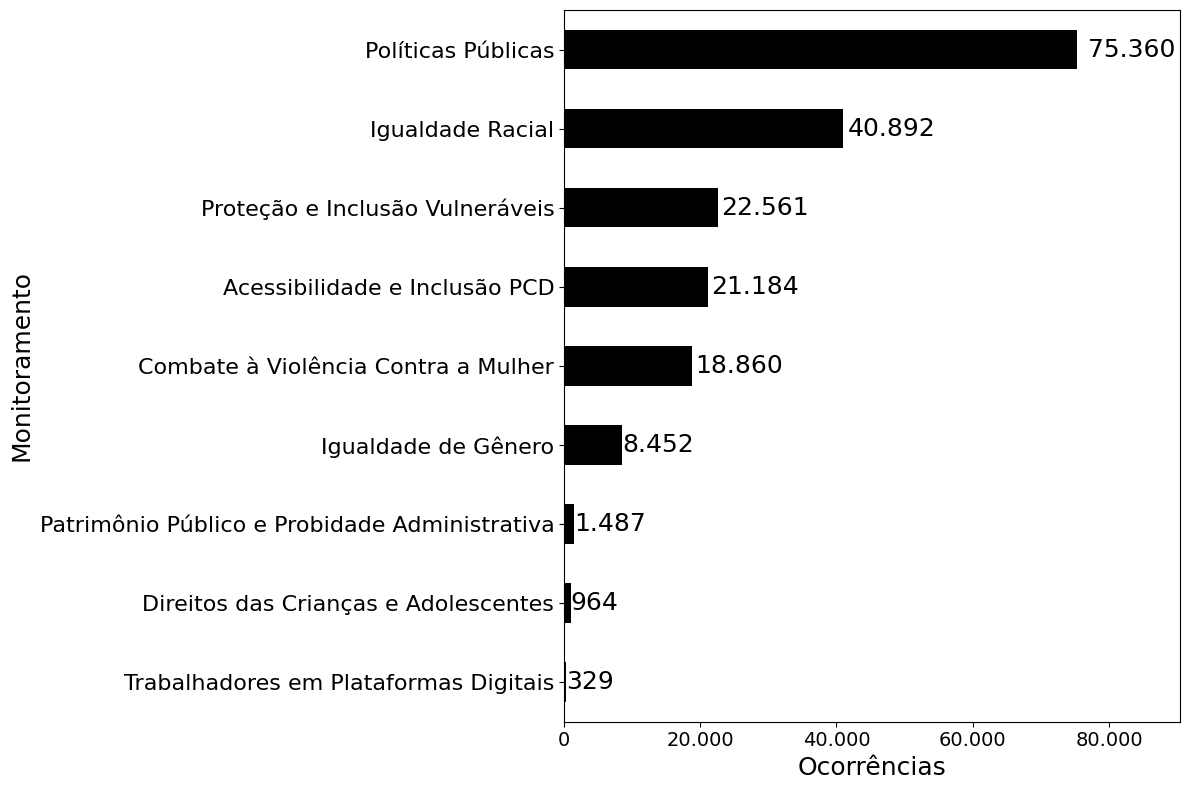

In [12]:
analisador.plota_grafico_ocorrencias_df(
    df_unificado,
    'monitoramento_nome.keyword', # Nome da coluna para agrupar os dados
    title='', # T√≠tulo do gr√°fico
    colors='black', # Cor das barras
    log_scale=False, # Escala logar√≠tmica no eixo X
    figsize=(12,8), # Tamanho da figura (valor sugerido, pode ser ajustado)
    fontsize=18,  # Definindo o tamanho da fonte (valor sugerido, pode ser ajustado)
    save_path=output_folder + 'grafico_geral_ocorrencias_monitoramento.png'
)

#Gr√°fico de intera√ß√µes por monitoramento

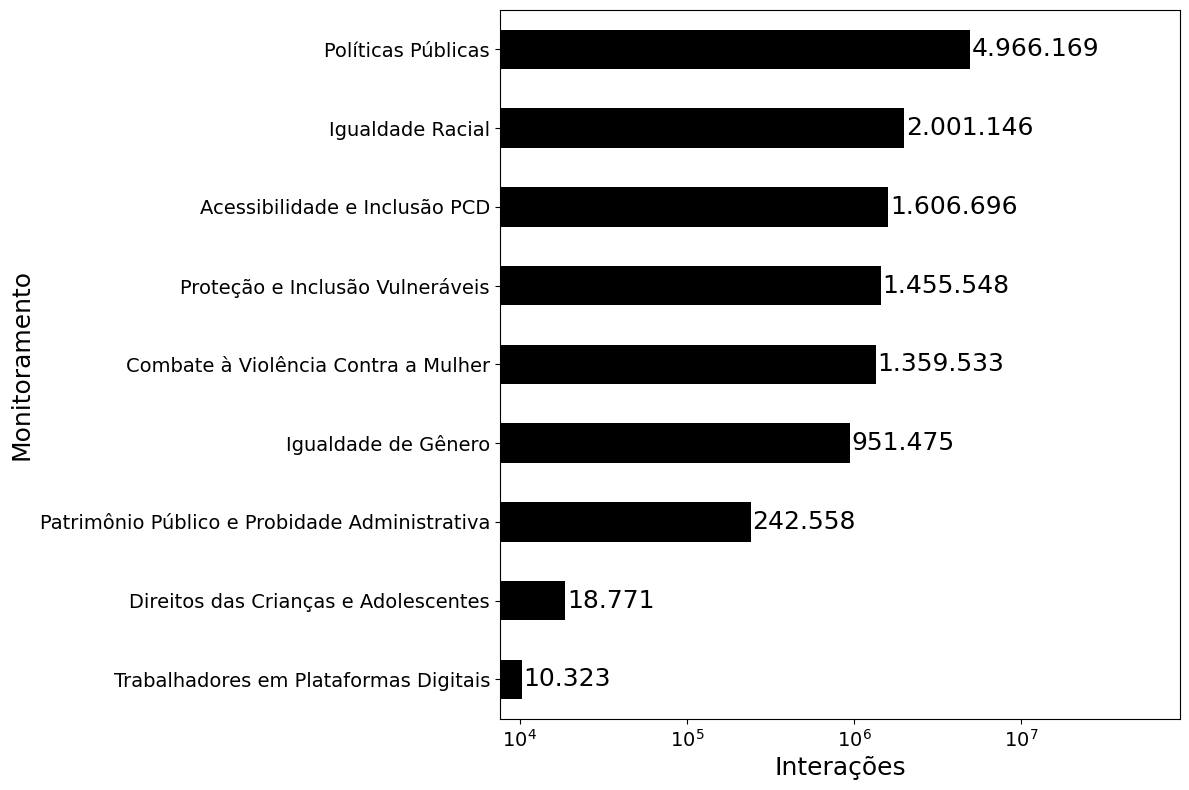

In [13]:
analisador.plota_grafico_interacoes(
    df_unificado,
    monitoramento_col='monitoramento_nome.keyword',  # Nome da coluna para agrupar os dados
    interacoes_col='interacoes',                        # Coluna com os valores a serem somados
    title='',        # T√≠tulo do gr√°fico
    colors='black',                                     # Cor das barras
    log_scale=True,                                     # Escala logar√≠tmica no eixo X
    figsize=(12,8),                                     # Tamanho da figura (valor sugerido, pode ser ajustado)
    fontsize=18,  # Definindo o tamanho da fonte (valor sugerido, pode ser ajustado)
    save_path=output_folder + 'grafico_geral_interacoes_monitoramento.png'
)

#Gr√°fico de ocorr√™ncias e intera√ß√µes di√°rias por monitoramento (linhas)

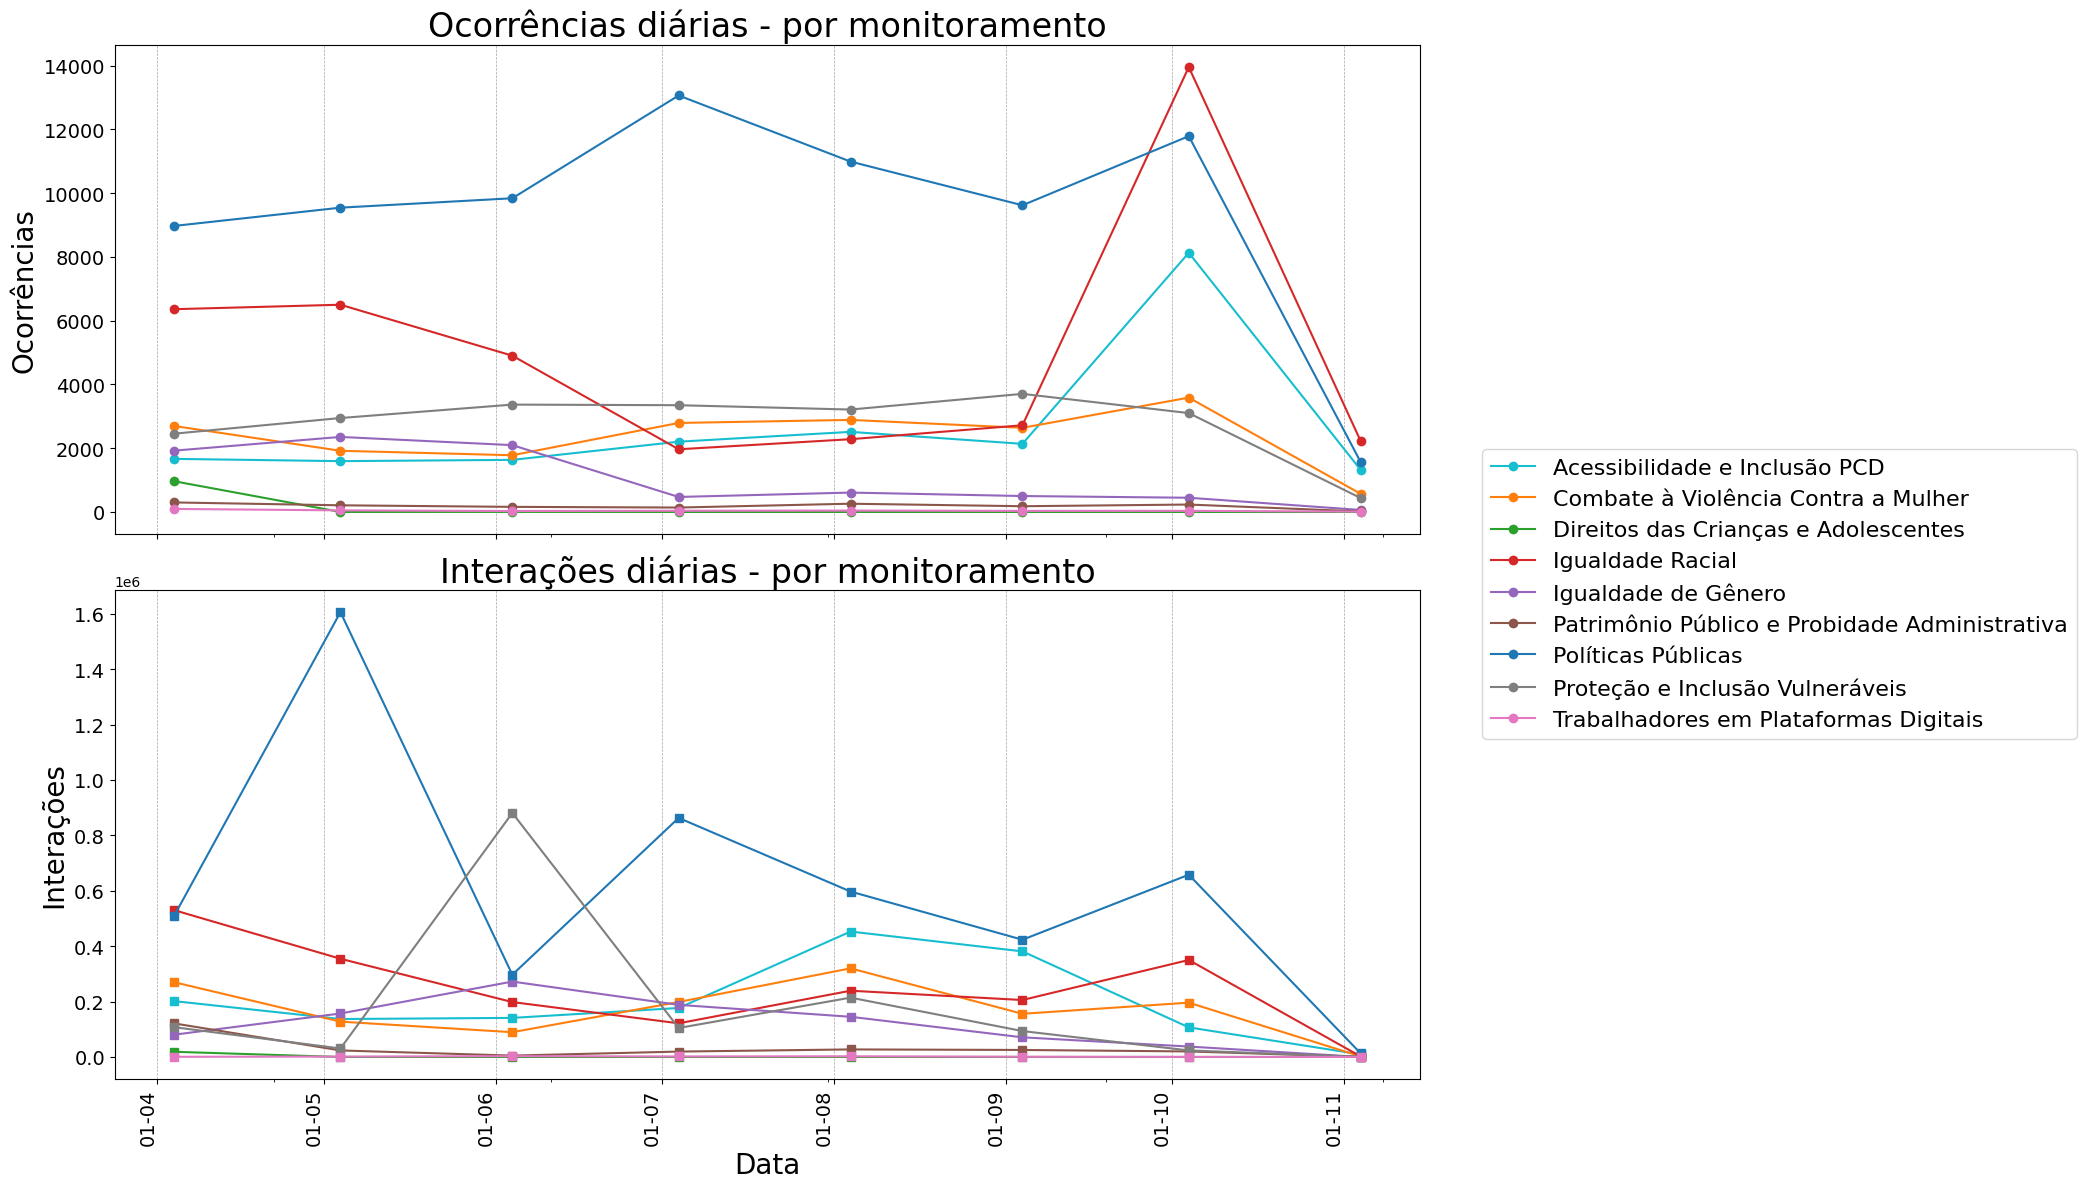

In [14]:
analisador.plota_grid_graficos_interacoes_e_ocorrencias_estilo_linha(
    df=df_unificado,
    top_title="por monitoramento",
    date_col="data",
    monitoramento_col="monitoramento_nome.keyword",
    ocorrencia_col="conteudo.keyword",
    interacoes_col="interacoes",
    figsize=(18, 12),
    title_fontsize=24,
    label_fontsize=20,
    legend_fontsize=16,
    tick_labelsize=14
)

#Gr√°fico de ocorr√™ncias e intera√ß√µes di√°rias por monitoramento (√°rea) - passe o mouse sobre o gr√°fico para ver o picos

In [15]:
analisador.plota_grid_graficos_interacoes_e_ocorrencias_area_interativo(
    df=df_unificado,
    top_title="Gr√°fico",
    date_col="data",
    monitoramento_col="monitoramento_nome.keyword",
    ocorrencia_col="conteudo.keyword",
    interacoes_col="interacoes"
)

#Gr√°fico de ocorr√™ncias e intera√ß√µes di√°rias por monitoramento (√°rea)

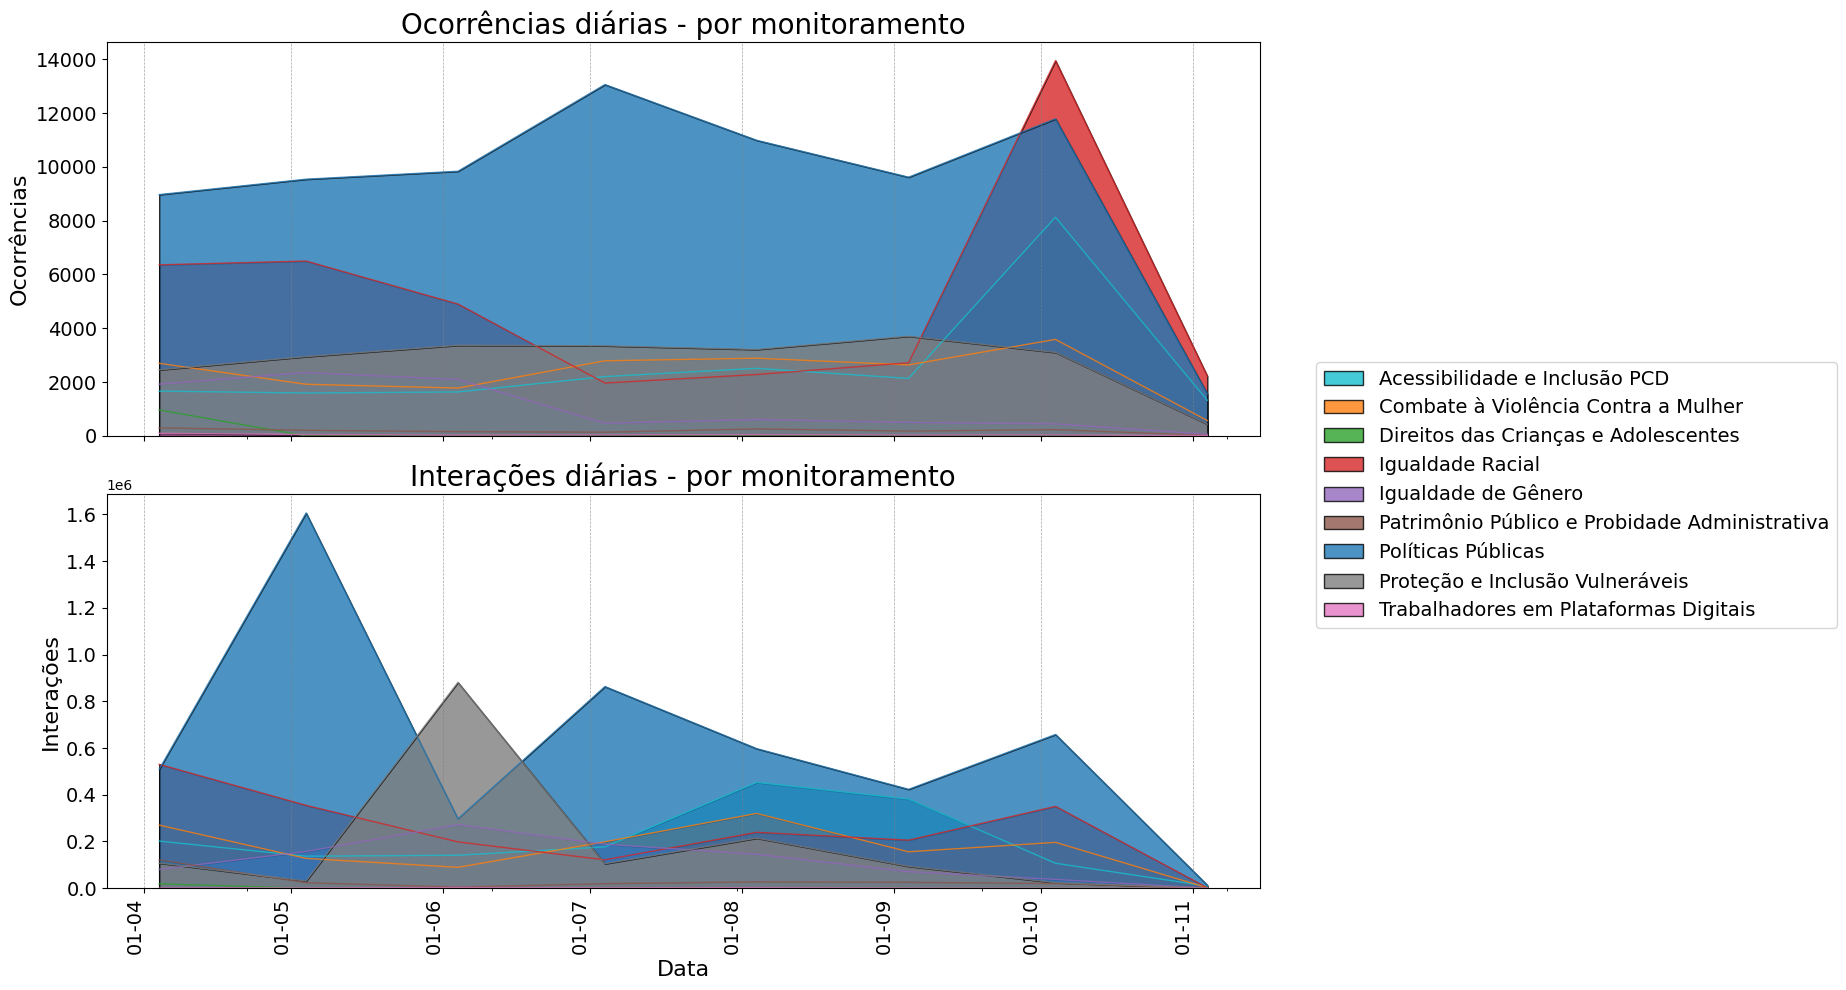

In [16]:
analisador.plota_grid_graficos_interacoes_e_ocorrencias_estilo_area(
    df=df_unificado,
    top_title="por monitoramento",
    date_col="data",
    monitoramento_col="monitoramento_nome.keyword",
    ocorrencia_col="conteudo.keyword",
    interacoes_col="interacoes",
    save_path=output_folder + 'grafico_geral_area.png'
)

##6. Cria uma tabela din√¢mica com os top N posts com mais intera√ß√µes a partir da escolha do monitoramento por um dropdrown

A tabela exibe um m√°ximo de 20 mil linhas. Voc√™ pode selecionar a quantidade de linhas da tabela  na vari√°vel quantidade_linhas



```
quantidade_linhas = 1000
```



In [22]:
#preencha a quantidade m√°xima de linhas que gostaria de visualizar aqui. Valores entre 1 e 20000
quantidade_linhas = 1000

In [23]:
# Selecionando as colunas de √≠ndice 0 a 6, mais 9 e 14 - isso remove as colunas desnecess√°rias para a an√°lise
colunas_escolhidas = ['data',
 'monitoramento_nome.keyword',
 'servico.keyword',
 'publicador_nome.keyword',
 'titulo',
 'conteudo.keyword',
 'link.keyword',
  'query',
 'interacoes',
]

df_unificado_resumido = df_unificado[colunas_escolhidas]

# Cria r√≥tulos no formato dia-m√™s para exibi√ß√£o no eixo X
df_unificado_resumido.loc[:, 'data'] = pd.to_datetime(df_unificado_resumido['data']).dt.strftime('%d-%m-%Y')

# Cria o dropdown usando os valores √∫nicos da coluna
options = df_unificado_resumido["monitoramento_nome.keyword"].unique().tolist()
dropdown_monitoramento = widgets.Dropdown(
    options=options,
    description="Monitoramento"
)

# Cria um Output para exibir os resultados
out = widgets.Output()

def atualiza_display(change):
    if change["type"] == "change" and change["name"] == "value":
        with out:
            clear_output()  # Limpa o output anterior
            monitoramento_valor = change["new"]

            # Filtra o DataFrame com base no valor do dropdown
            df_filtrado = df_unificado_resumido[
                df_unificado_resumido["monitoramento_nome.keyword"] == monitoramento_valor
            ]

            df_filtrado_sorted = df_filtrado.sort_values(
                by="interacoes", ascending=False
            )

            # Exibe as primeiras linhas do DataFrame filtrado
            display(df_filtrado_sorted.head(quantidade_linhas))

# Liga o callback ao dropdown
dropdown_monitoramento.observe(atualiza_display, names="value")

# Exibe o widget e a √°rea de output
display(dropdown_monitoramento)
display(out)

Dropdown(description='Monitoramento', options=('Pol√≠ticas P√∫blicas', 'Prote√ß√£o e Inclus√£o Vulner√°veis', 'Comba‚Ä¶

Output()